In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os.path
import itertools
from scipy import stats

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    #ax.set_xlabel('Run Type')

# Reading in Data

In [2]:
# mortality data sets (no shock (war, natural distaster, etc.))
# age 0-4 (youth)
df5 = pd.read_csv("noshock-5.csv")
# age 15-59 (adult)
df60 = pd.read_csv("noshock-60.csv")
# combine them
df = pd.concat([df5, df60], ignore_index=True)

# population counts dataset
df_pop = pd.read_csv("pop.csv")

# vehicle registration dataset
df_veh = pd.read_csv("veh-reg.csv")

In [3]:
df.head()

,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,year_id,measure_id,measure_name,metric_id,metric_name,val,upper,lower
0,1,Global,1,male,1,Under 5,1950,33,Probability of death no-shock with hiv,8,Probability of death,0.211479,0.233700,0.191125
1,1,Global,1,male,1,Under 5,1951,33,Probability of death no-shock with hiv,8,Probability of death,0.208153,0.230490,0.189132
2,1,Global,1,male,1,Under 5,1952,33,Probability of death no-shock with hiv,8,Probability of death,0.203444,0.224038,0.184705
3,1,Global,1,male,1,Under 5,1953,33,Probability of death no-shock with hiv,8,Probability of death,0.199828,0.219155,0.181873
4,1,Global,1,male,1,Under 5,1954,33,Probability of death no-shock with hiv,8,Probability of death,0.196090,0.214379,0.178952


In [4]:
df_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208,55434,56234,56699,57029,57357,...,102050,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765,134159786,137614644,141202036,144920186,148769974,...,532760424,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,9956318,...,30117411,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419,98407221,100506960,102691339,104953470,107289875,...,360285439,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938,5531451,5608499,5679409,5734995,5770573,...,24220660,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [5]:
df_veh.head()

,Country,Year,Data Source,Number of registered vehicles
0,Afghanistan,2013,RS_001,655357
1,Albania,2016,RS_002,563106
2,Antigua and Barbuda,2016,RS_003,36030
3,Argentina,2016,RS_004,21633587
4,Australia,2016,RS_005,18326236


# Tests ran to understand and help manually clean / align data

In [11]:
# find all countries in df_pop that aren't in deaths dfs
#not_in = []
#for country in df_pop["Country Name"]:
#    if country not in df["location_name"].unique():
#        not_in.append(country)
        
#print(not_in)
#print(len(df_pop))
#print(len(not_in))

In [12]:
# find all countries in df_pop that aren't in df_veh
#not_in = []
#for country in df_pop["Country Name"]:
#    if country not in df_veh["Country"].unique():
#        not_in.append(country)
        
#print(not_in)
#print(len(df_pop))
#print(len(not_in))

In [13]:
# find all countries in df_veh that aren't in deaths dfs
#not_in = []
#for country in df_veh["Country"]:
#    if country not in df["location_name"].unique():
#        not_in.append(country)
        
#print(not_in)
#print(len(df_veh))
#print(len(not_in))

In [14]:
# get all countries that are in all of the datasets
#countries = []
#for country in df["location_name"].unique():
#    if (country in df_pop["Country Name"].unique() and 
#            country in df_veh["Country"].unique()):
#        countries.append(country)

#print(len(countries))
#print(countries)

In [15]:
"""year = 1950
sex = "both"
location = "Zimbabwe"
age_group = 199

for year in range(1950, 2020):
    print(year)
    print(float(df[(df["age_group_id"] == age_group) &(df["location_name"] == location) & 
                   (df["sex_name"] == sex) & (df["year_id"] == year)]["val"]))
    print()"""

'year = 1950\nsex = "both"\nlocation = "Zimbabwe"\nage_group = 199\n\nfor year in range(1950, 2020):\n    print(year)\n    print(float(df[(df["age_group_id"] == age_group) &(df["location_name"] == location) & \n                   (df["sex_name"] == sex) & (df["year_id"] == year)]["val"]))\n    print()'

# Visualization and basic analysis

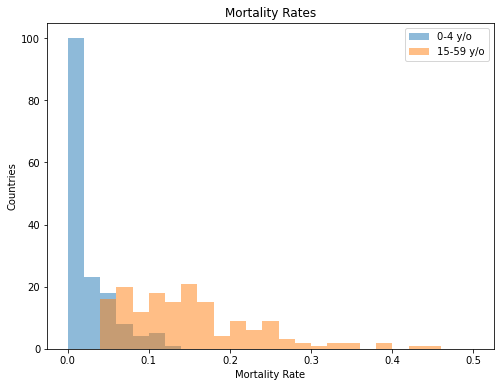

In [16]:
# histogram of death rates in 2019
plt.figure(figsize=(8,6))

death_rates_young = np.array(df[(df["location_name"].isin(countries)) & (df["age_group_id"] == 1) &
               (df["sex_name"] == "both") & (df["year_id"] == 2019)]["val"])

death_rates_old = np.array(df[(df["location_name"].isin(countries)) & (df["age_group_id"] == 199) &
               (df["sex_name"] == "both") & (df["year_id"] == 2019)]["val"])

plt.hist(death_rates_young, alpha=0.5, range=(0,0.5), bins=25, label="0-4 y/o")
plt.hist(death_rates_old, alpha=0.5, range=(0,0.5), bins=25, label="15-59 y/o")

plt.xlabel("Mortality Rate")
plt.ylabel("Countries")
plt.title("Mortality Rates")
plt.legend()
plt.show()

In [17]:
veh_reg_rates = np.zeros(len(countries))
death_rates_young = np.zeros(len(countries))
death_rates_old = np.zeros(len(countries))

for i, country in enumerate(countries):
    
    veh_reg_rates[i] = (float(df_veh[df_veh["Country"] == country]["Number of registered vehicles"]) / 
                     float(df_pop[df_pop["Country Name"] == country]["2016"]))
    
    death_rates_young[i] = float(df[(df["location_name"] == country) & (df["age_group_id"] == 1) &
               (df["sex_name"] == "both") & (df["year_id"] == 2016)]["val"])
    
    death_rates_old[i] = float(df[(df["location_name"] == country) & (df["age_group_id"] == 199) &
               (df["sex_name"] == "both") & (df["year_id"] == 2016)]["val"])

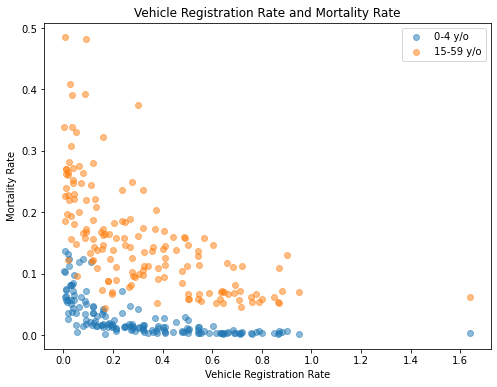

In [18]:
plt.figure(figsize=(8,6))

plt.scatter(veh_reg_rates, death_rates_young, alpha=0.5, label="0-4 y/o")
plt.scatter(veh_reg_rates, death_rates_old, alpha=0.5, label="15-59 y/o")

plt.ylabel("Mortality Rate")
plt.xlabel("Vehicle Registration Rate")
plt.title("Vehicle Registration Rate and Mortality Rate")
plt.legend()

plt.show()

In [19]:
print(np.where(veh_reg_rates > 1.5))
print(np.where(death_rates_old > 0.3))

(array([156]),)
(array([ 13,  14, 120, 124, 129, 132, 135, 136, 137, 138, 141, 148]),)


In [20]:
print(countries[154])

num = 133
print(countries[num])
print(death_rates_old[num])
print(veh_reg_rates[num])

Senegal
United Republic of Tanzania
0.229573886007868
0.04078519064677865


In [21]:
usa = np.where(np.array(countries) == "United States of America")[0]
neth = np.where(np.array(countries) == "Netherlands")[0]

print(death_rates_old[usa])
print(veh_reg_rates[usa])
print()
print(death_rates_old[neth])
print(veh_reg_rates[neth])

[0.10955012]
[0.87074293]

[0.05817682]
[0.63167684]


In [22]:
# https://en.wikipedia.org/wiki/Social_Progress_Index
# Social progress index

high_spis = np.zeros(30, dtype=int)
high_spis[0] = np.where(np.array(countries) == "Norway")[0]
high_spis[1] = np.where(np.array(countries) == "Denmark")[0]
high_spis[2] = np.where(np.array(countries) == "Finland")[0]
high_spis[3] = np.where(np.array(countries) == "New Zealand")[0]
high_spis[4] = np.where(np.array(countries) == "Sweden")[0]
high_spis[5] = np.where(np.array(countries) == "Switzerland")[0]
high_spis[6] = np.where(np.array(countries) == "Canada")[0]
high_spis[7] = np.where(np.array(countries) == "Australia")[0]
high_spis[8] = np.where(np.array(countries) == "Iceland")[0]
high_spis[9] = np.where(np.array(countries) == "Netherlands")[0]
high_spis[10] = np.where(np.array(countries) == "Germany")[0]
high_spis[11] = np.where(np.array(countries) == "Ireland")[0]
high_spis[12] = np.where(np.array(countries) == "Japan")[0]
high_spis[13] = np.where(np.array(countries) == "Luxembourg")[0]
high_spis[14] = np.where(np.array(countries) == "Austria")[0]
high_spis[15] = np.where(np.array(countries) == "Belgium")[0]
high_spis[16] = np.where(np.array(countries) == "Republic of Korea")[0]
high_spis[17] = np.where(np.array(countries) == "France")[0]
high_spis[18] = np.where(np.array(countries) == "Spain")[0]
high_spis[19] = np.where(np.array(countries) == "United Kingdom")[0]
high_spis[20] = np.where(np.array(countries) == "Portugal")[0]
high_spis[21] = np.where(np.array(countries) == "Slovenia")[0]
high_spis[22] = np.where(np.array(countries) == "Italy")[0]
high_spis[23] = np.where(np.array(countries) == "Estonia")[0]
high_spis[24] = np.where(np.array(countries) == "Czechia")[0]
high_spis[25] = np.where(np.array(countries) == "Cyprus")[0]
high_spis[26] = np.where(np.array(countries) == "Greece")[0]
high_spis[27] = np.where(np.array(countries) == "United States of America")[0]
high_spis[28] = np.where(np.array(countries) == "Singapore")[0]
high_spis[29] = np.where(np.array(countries) == "Malta")[0]
"""high_spis[30] = np.where(np.array(countries) == "Poland")[0]
high_spis[31] = np.where(np.array(countries) == "Lithuania")[0]
high_spis[32] = np.where(np.array(countries) == "Israel")[0]
high_spis[33] = np.where(np.array(countries) == "Chile")[0]
high_spis[34] = np.where(np.array(countries) == "Latvia")[0]
high_spis[35] = np.where(np.array(countries) == "Slovakia")[0]
high_spis[36] = np.where(np.array(countries) == "Costa Rica")[0]
high_spis[37] = np.where(np.array(countries) == "Uruguay")[0]
high_spis[38] = np.where(np.array(countries) == "Croatia")[0]
high_spis[39] = np.where(np.array(countries) == "Hungary")[0]
high_spis[40] = np.where(np.array(countries) == "Argentina")[0]
high_spis[41] = np.where(np.array(countries) == "Barbados")[0]"""

print(high_spis)

[63 51 52 47 66 67 72 46 56 62 54 57 43 60 48 49 44 53 65 68 64 35 59 37
 27 50 55 73 45 61]


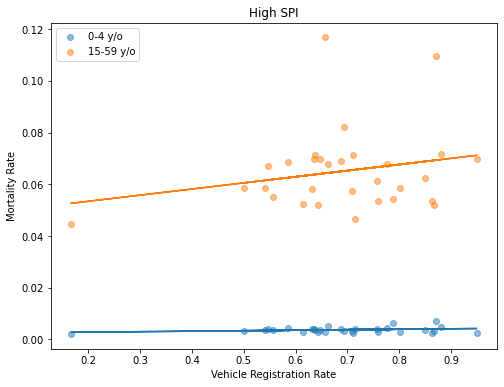

m1: 0.0018790778137550658
b1: 0.0024028772814887935
r2 1: 0.06617978130665975

m1: 0.023724561285831555
b1: 0.0486730537889758
r2 1: 0.05212748212203559


In [23]:
plt.figure(figsize=(8,6))

plt.scatter(veh_reg_rates[high_spis], death_rates_young[high_spis], alpha=0.5, label="0-4 y/o")
plt.scatter(veh_reg_rates[high_spis], death_rates_old[high_spis], alpha=0.5, label="15-59 y/o")

m, b, r_value, p_value, std_err = stats.linregress(veh_reg_rates[high_spis], death_rates_young[high_spis])
plt.plot(veh_reg_rates[high_spis], m*veh_reg_rates[high_spis] + b)

m2, b2, r_value2, p_value2, std_err2 = stats.linregress(veh_reg_rates[high_spis], death_rates_old[high_spis])
plt.plot(veh_reg_rates[high_spis], m2*veh_reg_rates[high_spis] + b2)

plt.xlabel("Vehicle Registration Rate")
plt.ylabel("Mortality Rate")
plt.title("High SPI")
plt.legend()

plt.show()

# Singapore has low vehicle ownership and death rate
# https://en.wikipedia.org/wiki/Driving_in_Singapore#Traffic_safety

# USA has high vehicle ownership and death rate

# USA has 5 times the number of vehicle related deaths vs Singapore

print("m1:", m)
print("b1:", b)
print("r2 1:", r_value**2)
print()
print("m1:", m2)
print("b1:", b2)
print("r2 1:", r_value2**2)

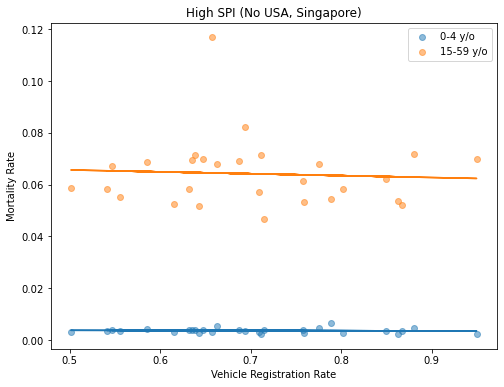

m1: -0.00048290667922259127
b1: 0.0039804766848311225
r2 1: 0.0037355312836434246

m1: -0.007293384837959951
b1: 0.0693041392392536
r2 1: 0.003949555131188734


In [24]:
plt.figure(figsize=(8,6))

plt.scatter(veh_reg_rates[np.delete(high_spis, [27, 28])], death_rates_young[np.delete(high_spis, [27, 28])], alpha=0.5, label="0-4 y/o")
plt.scatter(veh_reg_rates[np.delete(high_spis, [27, 28])], death_rates_old[np.delete(high_spis, [27, 28])], alpha=0.5, label="15-59 y/o")

m, b, r_value, p_value, std_err = stats.linregress(veh_reg_rates[np.delete(high_spis, [27, 28])], death_rates_young[np.delete(high_spis, [27, 28])])
plt.plot(veh_reg_rates[np.delete(high_spis, [27, 28])], m*veh_reg_rates[np.delete(high_spis, [27, 28])] + b)


m2, b2, r_value2, p_value2, std_err2 = stats.linregress(veh_reg_rates[np.delete(high_spis, [27, 28])], death_rates_old[np.delete(high_spis, [27, 28])])
plt.plot(veh_reg_rates[np.delete(high_spis, [27, 28])], m2*veh_reg_rates[np.delete(high_spis, [27, 28])] + b2)

plt.xlabel("Vehicle Registration Rate")
plt.ylabel("Mortality Rate")
plt.title("High SPI (No USA, Singapore)")
plt.legend()

plt.show()

# Singapore has low vehicle ownership and death rate
# https://en.wikipedia.org/wiki/Driving_in_Singapore#Traffic_safety

# USA has high vehicle ownership and death rate

# USA has 5 times the number of vehicle related deaths vs Singapore

print("m1:", m)
print("b1:", b)
print("r2 1:", r_value**2)
print()
print("m1:", m2)
print("b1:", b2)
print("r2 1:", r_value2**2)

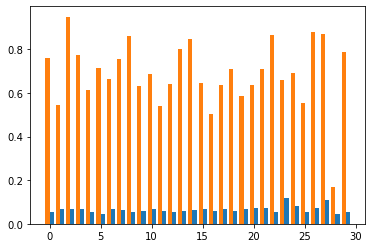

In [25]:
plt.bar(np.arange(len(death_rates_old[high_spis]))+0.2, death_rates_old[high_spis], width=0.4)
plt.bar(np.arange(len(death_rates_old[high_spis]))-0.2, veh_reg_rates[high_spis], width=0.4)
plt.show()

In [26]:
# get all countries in main dataset
countries2 = []
for country in df["location_name"].unique():
    if country not in ["South Asia"]:
        countries2.append(country)

#print(len(countries2))
#print(countries2)

In [27]:
death_rates_young2 = np.zeros(len(countries2))
death_rates_old2 = np.zeros(len(countries2))

for i, country in enumerate(countries2):
    
    death_rates_young2[i] = float(df[(df["location_name"] == country) & (df["age_group_id"] == 1) &
               (df["sex_name"] == "both") & (df["year_id"] == 2019)]["val"])
    
    death_rates_old2[i] = float(df[(df["location_name"] == country) & (df["age_group_id"] == 199) &
               (df["sex_name"] == "both") & (df["year_id"] == 2019)]["val"])

In [28]:
# https://en.wikipedia.org/wiki/Social_Progress_Index
# Social Progress Index

low_spis = np.zeros(30, dtype=int)
low_spis[0] = np.where(np.array(countries2) == "South Sudan")[0]
low_spis[1] = np.where(np.array(countries2) == "Chad")[0]
low_spis[2] = np.where(np.array(countries2) == "Central African Republic")[0]
low_spis[3] = np.where(np.array(countries2) == "Eritrea")[0]
low_spis[4] = np.where(np.array(countries2) == "Somalia")[0]
low_spis[5] = np.where(np.array(countries2) == "Burundi")[0]
low_spis[6] = np.where(np.array(countries2) == "Niger")[0]
low_spis[7] = np.where(np.array(countries2) == "Democratic Republic of the Congo")[0]
low_spis[8] = np.where(np.array(countries2) == "Afghanistan")[0]
low_spis[9] = np.where(np.array(countries2) == "Guinea")[0]
low_spis[10] = np.where(np.array(countries2) == "Papua New Guinea")[0]
low_spis[11] = np.where(np.array(countries2) == "Guinea-Bissau")[0]
low_spis[12] = np.where(np.array(countries2) == "Angola")[0]
low_spis[13] = np.where(np.array(countries2) == "Mali")[0]
low_spis[14] = np.where(np.array(countries2) == "Congo")[0]
low_spis[15] = np.where(np.array(countries2) == "Madagascar")[0]
low_spis[16] = np.where(np.array(countries2) == "Sudan")[0]
low_spis[17] = np.where(np.array(countries2) == "Djibouti")[0]
low_spis[18] = np.where(np.array(countries2) == "Ethiopia")[0]
low_spis[19] = np.where(np.array(countries2) == "Haiti")[0]
low_spis[20] = np.where(np.array(countries2) == "Mauritania")[0]
low_spis[21] = np.where(np.array(countries2) == "Mozambique")[0]
low_spis[22] = np.where(np.array(countries2) == "Pakistan")[0]
low_spis[23] = np.where(np.array(countries2) == "Burkina Faso")[0]
low_spis[24] = np.where(np.array(countries2) == "Democratic People's Republic of Korea")[0]
low_spis[25] = np.where(np.array(countries2) == "Equatorial Guinea")[0]
low_spis[26] = np.where(np.array(countries2) == "Cameroon")[0]
low_spis[27] = np.where(np.array(countries2) == "Nigeria")[0]
low_spis[28] = np.where(np.array(countries2) == "Liberia")[0]
low_spis[29] = np.where(np.array(countries2) == "Sierra Leone")[0]

print(low_spis)

[236 197 163 172 181 169 206 165 154 201  23 202 162 204 164 175 239 171
 173 111 205 178 159 194   4 166 195 207 203 210]


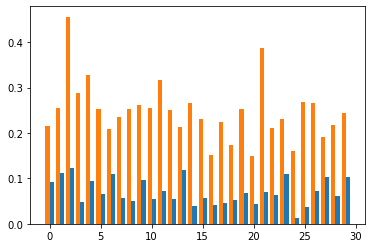

In [29]:
plt.bar(np.arange(len(death_rates_young2[low_spis]))+0.2, death_rates_young2[low_spis], width=0.4)
plt.bar(np.arange(len(death_rates_old2[low_spis]))-0.2, death_rates_old2[low_spis], width=0.4)
plt.show()

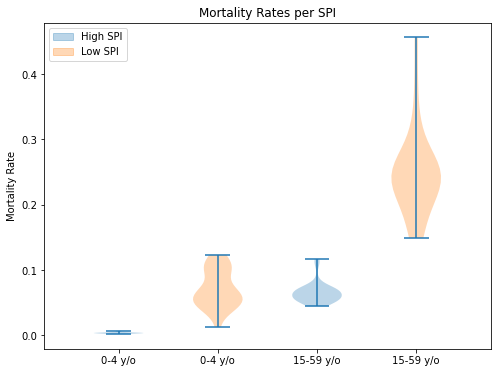

In [30]:
plt.figure(figsize=(8,6))

ax = plt.axes()

out=plt.violinplot((death_rates_young[high_spis], 
                death_rates_young2[low_spis],
                death_rates_old[high_spis],
                death_rates_old2[low_spis]),
              points=30)

for b,c in zip(out['bodies'], [colors[0], colors[1], colors[0], colors[1]]):
    b.set_facecolor(c)

set_axis_style(ax, ["0-4 y/o", "0-4 y/o", "15-59 y/o", "15-59 y/o"])

plt.ylabel("Mortality Rate")
plt.title("Mortality Rates per SPI")
plt.legend(["High SPI", "Low SPI"], loc="upper left")
leg = ax.get_legend()
leg.legendHandles[0].set_color(colors[0])
leg.legendHandles[1].set_color(colors[1])

plt.show()

In [31]:
df_ages_young = pd.read_csv("ages-young.csv")
df_ages_young.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.847190,43.358346,42.925745,42.488756,41.950133,41.290098,...,20.530937,20.092629,19.593055,19.111724,18.703098,18.257495,17.980183,17.802447,17.620445,17.381938
1,Africa Eastern and Southern,AFE,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.676017,43.935619,44.143810,44.301017,44.402172,44.449873,...,43.334272,43.181020,42.996145,42.789731,42.566038,42.346779,42.105206,41.841591,41.555023,41.246641
2,Afghanistan,AFG,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,42.140851,42.453942,42.637354,42.748804,42.854745,42.981805,...,47.701590,47.089759,46.386671,45.640589,44.877039,44.272113,43.682526,43.090176,42.472271,41.822601
3,Africa Western and Central,AFW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,41.681961,41.926237,42.108779,42.244310,42.338414,42.394634,...,44.233261,44.222077,44.178550,44.099027,43.982674,43.891295,43.749766,43.567668,43.357174,43.125559
4,Angola,AGO,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,42.132067,42.790762,43.496568,44.090193,44.419171,44.464828,...,47.144535,47.196019,47.205425,47.177159,47.108971,47.053352,46.953016,46.808925,46.622025,46.395362


In [32]:
df_ages_old = pd.read_csv("ages-old.csv")
df_ages_old.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,53.669919,54.056784,54.383281,54.710292,55.119933,55.631102,...,68.885601,68.986934,69.108851,69.181105,69.159774,69.137615,68.946339,68.646606,68.321199,68.012289
1,Africa Eastern and Southern,AFE,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,53.233285,52.970273,52.766787,52.620191,52.533177,52.501886,...,53.670988,53.810939,53.983047,54.176742,54.387062,54.578554,54.793998,55.032025,55.292468,55.573291
2,Afghanistan,AFG,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,55.060841,54.737928,54.558533,54.465025,54.391032,54.309303,...,49.943948,50.523947,51.193122,51.907836,52.644299,53.207964,53.763223,54.324898,54.911934,55.528329
3,Africa Western and Central,AFW,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,55.382976,55.113824,54.916703,54.777651,54.691893,54.655374,...,52.968768,52.982579,53.033964,53.124645,53.253879,53.335444,53.470925,53.649476,53.857875,54.087793
4,Angola,AGO,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,54.860985,54.164118,53.438944,52.838457,52.510146,52.473291,...,50.508035,50.467978,50.471792,50.519797,50.615167,50.685629,50.807787,50.974702,51.178633,51.413175


In [33]:
# find all countries in df_ages that aren't in deaths dfs
not_in = []
countries3 = []
for country in df_ages_old["Country Name"].unique():
    if country not in df["location_name"].unique():
        not_in.append(country)
    else:
        countries3.append(country)
        
countries3 = np.array(countries3)

In [34]:
# https://en.wikipedia.org/wiki/Social_Progress_Index
# Social progress index

high_spis2 = np.zeros(30, dtype=int)
high_spis2[0] = np.where(np.array(countries3) == "Norway")[0]
high_spis2[1] = np.where(np.array(countries3) == "Denmark")[0]
high_spis2[2] = np.where(np.array(countries3) == "Finland")[0]
high_spis2[3] = np.where(np.array(countries3) == "New Zealand")[0]
high_spis2[4] = np.where(np.array(countries3) == "Sweden")[0]
high_spis2[5] = np.where(np.array(countries3) == "Switzerland")[0]
high_spis2[6] = np.where(np.array(countries3) == "Canada")[0]
high_spis2[7] = np.where(np.array(countries3) == "Australia")[0]
high_spis2[8] = np.where(np.array(countries3) == "Iceland")[0]
high_spis2[9] = np.where(np.array(countries3) == "Netherlands")[0]
high_spis2[10] = np.where(np.array(countries3) == "Germany")[0]
high_spis2[11] = np.where(np.array(countries3) == "Ireland")[0]
high_spis2[12] = np.where(np.array(countries3) == "Japan")[0]
high_spis2[13] = np.where(np.array(countries3) == "Luxembourg")[0]
high_spis2[14] = np.where(np.array(countries3) == "Austria")[0]
high_spis2[15] = np.where(np.array(countries3) == "Belgium")[0]
high_spis2[16] = np.where(np.array(countries3) == "Republic of Korea")[0]
high_spis2[17] = np.where(np.array(countries3) == "France")[0]
high_spis2[18] = np.where(np.array(countries3) == "Spain")[0]
high_spis2[19] = np.where(np.array(countries3) == "United Kingdom")[0]
high_spis2[20] = np.where(np.array(countries3) == "Portugal")[0]
high_spis2[21] = np.where(np.array(countries3) == "Slovenia")[0]
high_spis2[22] = np.where(np.array(countries3) == "Italy")[0]
high_spis2[23] = np.where(np.array(countries3) == "Estonia")[0]
high_spis2[24] = np.where(np.array(countries3) == "Czechia")[0]
high_spis2[25] = np.where(np.array(countries3) == "Cyprus")[0]
high_spis2[26] = np.where(np.array(countries3) == "Greece")[0]
high_spis2[27] = np.where(np.array(countries3) == "United States of America")[0]
high_spis2[28] = np.where(np.array(countries3) == "Singapore")[0]
high_spis2[29] = np.where(np.array(countries3) == "Malta")[0]

low_spis2 = np.zeros(29, dtype=int)
low_spis2[0] = np.where(np.array(countries3) == "South Sudan")[0]
low_spis2[1] = np.where(np.array(countries3) == "Chad")[0]
low_spis2[2] = np.where(np.array(countries3) == "Central African Republic")[0]
#low_spis2[3] = np.where(np.array(countries3) == "Eritrea")[0]
low_spis2[3] = np.where(np.array(countries3) == "Somalia")[0]
low_spis2[4] = np.where(np.array(countries3) == "Burundi")[0]
low_spis2[5] = np.where(np.array(countries3) == "Niger")[0]
low_spis2[6] = np.where(np.array(countries3) == "Democratic Republic of the Congo")[0]
low_spis2[7] = np.where(np.array(countries3) == "Afghanistan")[0]
low_spis2[8] = np.where(np.array(countries3) == "Guinea")[0]
low_spis2[9] = np.where(np.array(countries3) == "Papua New Guinea")[0]
low_spis2[10] = np.where(np.array(countries3) == "Guinea-Bissau")[0]
low_spis2[11] = np.where(np.array(countries3) == "Angola")[0]
low_spis2[12] = np.where(np.array(countries3) == "Mali")[0]
low_spis2[13] = np.where(np.array(countries3) == "Congo")[0]
low_spis2[14] = np.where(np.array(countries3) == "Madagascar")[0]
low_spis2[15] = np.where(np.array(countries3) == "Sudan")[0]
low_spis2[16] = np.where(np.array(countries3) == "Djibouti")[0]
low_spis2[17] = np.where(np.array(countries3) == "Ethiopia")[0]
low_spis2[18] = np.where(np.array(countries3) == "Haiti")[0]
low_spis2[19] = np.where(np.array(countries3) == "Mauritania")[0]
low_spis2[20] = np.where(np.array(countries3) == "Mozambique")[0]
low_spis2[21] = np.where(np.array(countries3) == "Pakistan")[0]
low_spis2[22] = np.where(np.array(countries3) == "Burkina Faso")[0]
low_spis2[23] = np.where(np.array(countries3) == "Democratic People's Republic of Korea")[0]
low_spis2[24] = np.where(np.array(countries3) == "Equatorial Guinea")[0]
low_spis2[25] = np.where(np.array(countries3) == "Cameroon")[0]
low_spis2[26] = np.where(np.array(countries3) == "Nigeria")[0]
low_spis2[27] = np.where(np.array(countries3) == "Liberia")[0]
low_spis2[28] = np.where(np.array(countries3) == "Sierra Leone")[0]

In [35]:
pop_young = np.zeros(len(countries3))
pop_old = np.zeros(len(countries3))

for i, country in enumerate(countries3):
    
    pop_young[i] = float(df_ages_young[(df_ages_young["Country Name"] == country)]["2019"])
    
    pop_old[i] = float(df_ages_old[(df_ages_old["Country Name"] == country)]["2019"])

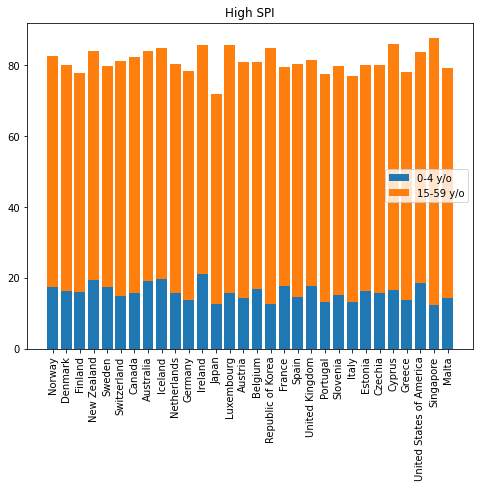

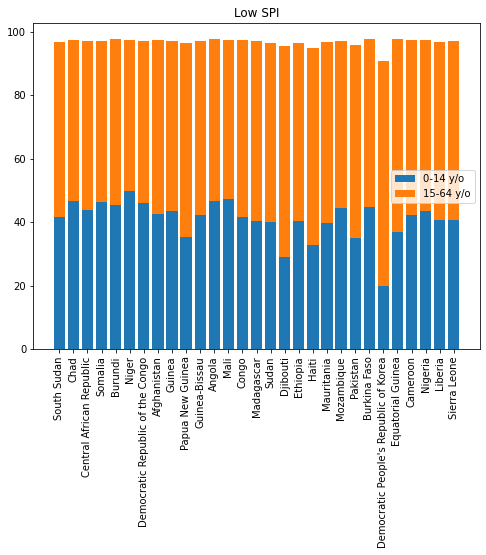

In [36]:
plt.figure(figsize=(8,6))

plt.bar(countries3[high_spis2], pop_young[high_spis2], label="0-4 y/o")
plt.bar(countries3[high_spis2], pop_old[high_spis2], bottom=pop_young[high_spis2], label="15-59 y/o")

plt.xticks(rotation=90)
plt.legend(loc="right")
plt.title("High SPI")
plt.show()

plt.figure(figsize=(8,6))

plt.bar(countries3[low_spis2], pop_young[low_spis2], label="0-14 y/o")
plt.bar(countries3[low_spis2], pop_old[low_spis2], bottom=pop_young[low_spis2], label="15-64 y/o")

plt.xticks(rotation=90)
plt.legend(loc="right")
plt.title("Low SPI")
plt.show()

In [37]:
# for some reason south asia doesn't work below, so remove it
countries4 = np.delete(countries3, np.where(countries3=="South Asia"))

In [38]:
if os.path.isfile("ages_young_changes.pkl"):
    with open('ages_young_changes.pkl', 'rb') as f:
        ages_young_changes = pickle.load(f)
        
    with open('ages_old_changes.pkl', 'rb') as f:
        ages_old_changes = pickle.load(f)
        
    with open('ages_oldest_changes.pkl', 'rb') as f:
        ages_oldest_changes = pickle.load(f)
        
    with open('deaths_young_changes.pkl', 'rb') as f:
        deaths_young_changes = pickle.load(f)
        
    with open('deaths_old_changes.pkl', 'rb') as f:
        deaths_old_changes = pickle.load(f)
        
else:

    # get rate of ages and death changes from 1960-2019
    ages_young_changes = np.zeros(len(countries4), dtype=float)
    ages_old_changes = np.zeros(len(countries4), dtype=float)
    ages_oldest_changes = np.zeros(len(countries4), dtype=float)
    deaths_young_changes = np.zeros(len(countries4), dtype=float)
    deaths_old_changes = np.zeros(len(countries4), dtype=float)
    for i, country in enumerate(countries4):
        for year in range(1961, 2020):
            ages_young_changes[i] += (float(df_ages_young[df_ages_young["Country Name"] == country][str(year)]) - 
                                      float(df_ages_young[df_ages_young["Country Name"] == country][str(year-1)]))/100

            ages_old_changes[i] += (float(df_ages_old[df_ages_old["Country Name"] == country][str(year)]) - 
                                      float(df_ages_old[df_ages_old["Country Name"] == country][str(year-1)]))/100

            # this is erranous, just don't use it
            ages_oldest_changes[i] += 1-(ages_young_changes[i]+ages_old_changes[i])

            deaths_young_changes[i] += (float(df[(df["location_name"] == country) & (df["age_group_id"] == 1) &
                   (df["sex_name"] == "both") & (df["year_id"] == year)]["val"]) -
                        float(df[(df["location_name"] == country) & (df["age_group_id"] == 1) &
                   (df["sex_name"] == "both") & (df["year_id"] == year-1)]["val"]))

            deaths_old_changes[i] += (float(df[(df["location_name"] == country) & (df["age_group_id"] == 199) &
                   (df["sex_name"] == "both") & (df["year_id"] == year)]["val"]) -
                        float(df[(df["location_name"] == country) & (df["age_group_id"] == 199) &
                   (df["sex_name"] == "both") & (df["year_id"] == year-1)]["val"]))

    ages_young_changes /= 58
    ages_old_changes /= 58
    ages_oldest_changes /= 58
    deaths_young_changes /= 58
    deaths_old_changes /= 58
    
    with open('ages_young_changes.pkl', 'wb') as f:
        pickle.dump(ages_young_changes, f)

    with open('ages_old_changes.pkl', 'wb') as f:
        pickle.dump(ages_old_changes, f)

    with open('ages_oldest_changes.pkl', 'wb') as f:
        pickle.dump(ages_oldest_changes, f)

    with open('deaths_young_changes.pkl', 'wb') as f:
        pickle.dump(deaths_young_changes, f)

    with open('deaths_old_changes.pkl', 'wb') as f:
        pickle.dump(deaths_old_changes, f)

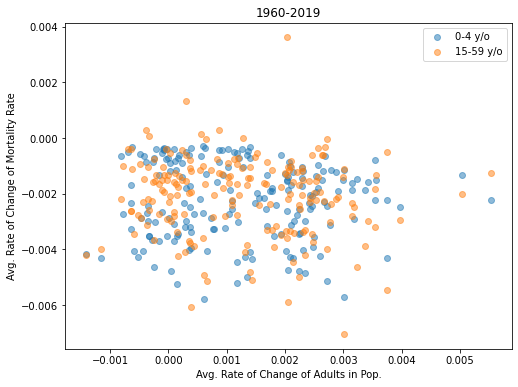

Total: 188
q4 145
q3and4 181


In [39]:
plt.figure(figsize=(8,6))

plt.scatter(ages_old_changes, deaths_young_changes, alpha=0.5, label="0-4 y/o")
plt.scatter(ages_old_changes, deaths_old_changes, alpha=0.5, label="15-59 y/o")

plt.xlabel("Avg. Rate of Change of Adults in Pop.")
plt.ylabel("Avg. Rate of Change of Mortality Rate")
plt.title("1960-2019")
plt.legend()

plt.show()

q3 = 0
q4 = 0
q3and4 = 0
for i in range(len(ages_old_changes)):
    if ages_old_changes[i] > 0 and deaths_old_changes[i] < 0:
        q4 += 1
        
    if deaths_old_changes[i] < 0:
        q3and4 += 1
        
    
print("Total:", len(ages_old_changes))
print("q4", q4)
print("q3and4", q3and4)

In [40]:
ages_young = np.zeros(len(countries4), dtype=float)
ages_old = np.zeros(len(countries4), dtype=float)
ages_oldest = np.zeros(len(countries4), dtype=float)
deaths_young = np.zeros(len(countries4), dtype=float)
deaths_old = np.zeros(len(countries4), dtype=float)
for i, country in enumerate(countries4):
    ages_young[i] = float(df_ages_young[df_ages_young["Country Name"] == country][str(2019)])/100

    ages_old[i] = float(df_ages_old[df_ages_old["Country Name"] == country][str(2019)])/100

    ages_oldest_changes[i] = 1-(ages_young[i]+ages_old[i])

    deaths_young[i] = float(df[(df["location_name"] == country) & (df["age_group_id"] == 1) &
           (df["sex_name"] == "both") & (df["year_id"] == 2019)]["val"])

    deaths_old[i] = float(df[(df["location_name"] == country) & (df["age_group_id"] == 199) &
           (df["sex_name"] == "both") & (df["year_id"] == 2019)]["val"])

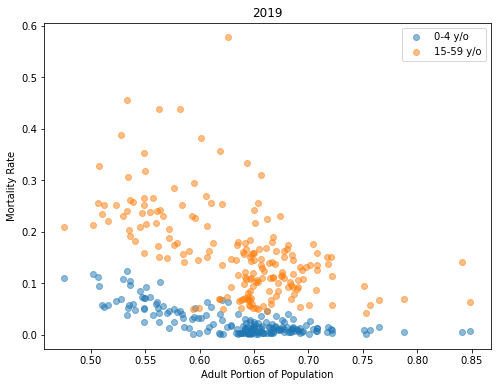

In [41]:
plt.figure(figsize=(8,6))

plt.scatter(ages_old, deaths_young, alpha=0.5, label="0-4 y/o")
plt.scatter(ages_old, deaths_old, alpha=0.5, label="15-59 y/o", color=colors[1])

plt.xlabel("Adult Portion of Population")
plt.ylabel("Mortality Rate")
plt.title("2019")
plt.legend()

plt.show()